In [34]:
import nltk 
import collections
import os 
from sklearn import (datasets, model_selection, feature_extraction, linear_model)
from IPython.display import Image 

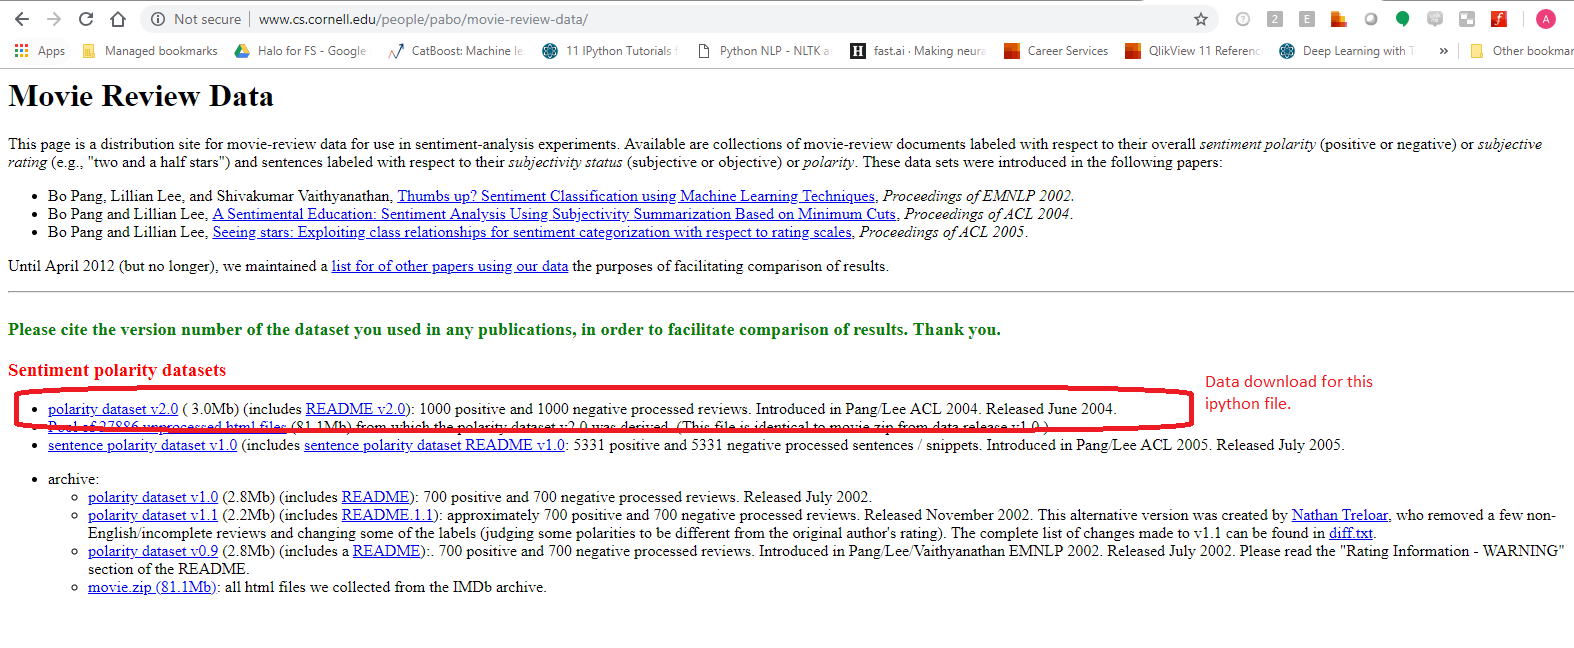

In [35]:
Image('C:/Users/asingh368/Desktop/POC/Data/Data_Source.png')

## Once the data is downloaded we provide the directory path containg the raw data
### Folder structure : Moview_Review --> two_folders (pos, neg) 

In [4]:
data_folder = r'C:\Users\asingh368\Desktop\POC\Data\Movie_Review'

## Using the scikit learns default method it is easy for us to tag the data and saves a few manual steps 

In [5]:
movie_review_data = datasets.load_files(data_folder, shuffle=True)

In [6]:
print('{} files loaded.'.format(len(movie_review_data.data)))
print('Classes contained in the data: {}.'.format(movie_review_data.target_names))

2000 files loaded.
Classes contained in the data: ['neg', 'pos'].


## CountVectorizer - Simply aggregates all the Unique words within the corpus of documents and then fill in the frequency of each word by document. 
## Count vectorizer tokenizer and it performs certain cleaning tasks for us 
### converting everything to lowercase
### removing stop words like (a, the etc.) 
### min_df (minimum document frequecy is set to 1 but this can be altered

In [7]:
def extract_features(corpus):
    ''' Extract Term frequency and Inverse Document Frequency from Corpus'''
    count_vectorizer = feature_extraction.text.CountVectorizer(
    lowercase = True, 
    tokenizer = nltk.word_tokenize, 
    stop_words = 'english',
    min_df=1)
    processed_corpus = count_vectorizer.fit_transform(corpus)
    processed_corpus = feature_extraction.text.TfidfTransformer().fit_transform(processed_corpus)
    
    return processed_corpus

## Calling our feature extraction function on our dataset 

In [10]:
movie_tfidf = extract_features(movie_review_data.data)

## Creating training and test sets for our model 

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(movie_tfidf, movie_review_data.target, test_size=0.30,
                                                                   random_state=42)

## Initializing and Training our model 

In [12]:
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Evaluating the model performance 

In [13]:
model.score(X_test, y_test)

0.795

## The model performance is 80% neither good nor bad but what it tells us is that this can be used as a baseline as we look to add more and more complexities in our model. 

In [17]:
predicted_label = model.predict(X_test)
for i in range(5):
    print('Review:\n{review}\n-\nCorrect label: {correct}; Predicted: {predict}'.format(
          review=X_test[i], correct=y_test[i], predict=predicted_label[i]))

Review:
  (0, 15495)	0.08562453929860635
  (0, 16075)	0.08562453929860635
  (0, 25519)	0.08562453929860635
  (0, 40333)	0.08562453929860635
  (0, 18366)	0.08562453929860635
  (0, 38388)	0.08562453929860635
  (0, 24341)	0.08123447317058612
  (0, 26423)	0.08123447317058612
  (0, 7356)	0.08123447317058612
  (0, 45613)	0.08123447317058612
  (0, 6315)	0.07372960555495599
  (0, 32613)	0.07061480406734608
  (0, 13836)	0.06535809670996791
  (0, 30560)	0.07206057987410651
  (0, 16379)	0.0574446056832854
  (0, 23315)	0.07061480406734608
  (0, 8667)	0.061834671811305635
  (0, 30000)	0.1183613465658554
  (0, 11075)	0.06716683059103849
  (0, 3958)	0.07570364394909454
  (0, 16080)	0.08123447317058612
  (0, 20129)	0.0781196716829762
  (0, 24675)	0.07570364394909454
  (0, 11492)	0.08123447317058612
  (0, 600)	0.07372960555495599
  :	:
  (0, 1758)	0.025522342680743385
  (0, 33212)	0.024105513200181974
  (0, 24785)	0.02667479194403957
  (0, 12601)	0.17172302155069424
  (0, 17573)	0.03364855947402738
  (

## Now that we have defined a baseline performance for our model we will try to Boost our Model performance 
## Text data poses various complexities for example absence of word can alter the meaning of the sentence. For e.g. "The director does not waste time in getting to the main story" is different if we remove "not". And we need to consider these words which might fall in stopwords category and exclude them from that list or build our own list 

In [23]:
import re 
from nltk.corpus import words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asingh368\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Now we add another list of words to our predefined extract_features function which can alter the meaning of the sentence 
## Now we are looking to include more intelligent features in our model to improve performace 
### N-grams - unigram:single word, bi-gram:2 words combination, tri-gram:3 words and so on 

In [24]:
def extract_features(corpus):
    stop_words = nltk.corpus.stopwords.words('english')
    
    invert_list = ['what', 'but', 'if', 'because', 'as', 'until', 'against',
        'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
        'further', 'then', 'once', 'here', 'there', 'why', 'how', 'all', 'any',
        'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
        'same', 'so', 'than', 'too', 'can', 'will', 'just', 'don', 'should']
    
    #removing these words from the stopwords from standard nltk stopwords 
    stop_words = [i for i in stop_words if i not in invert_list]
    
    #adjusting the model parameters to consider N-Grams 1 & 2 
    count_vectorizer = feature_extraction.text.CountVectorizer(lowercase=True, 
                                                              tokenizer=nltk.word_tokenize, 
                                                              min_df=2, #word should appear atleast twice in the document
                                                              ngram_range= (1,2), 
                                                              stop_words= stop_words)
    processed_corpus = count_vectorizer.fit_transform(corpus)
    processed_corpus = feature_extraction.text.TfidfTransformer().fit_transform(processed_corpus)
    
    return processed_corpus    

## Creating training & test sets, fitting the model and evaluating the score 

In [27]:
movie_tfidf = extract_features(movie_review_data.data)

X_train, X_test, y_train, y_test = model_selection.train_test_split(movie_tfidf, movie_review_data.target, test_size=0.30,
                                                                   random_state=42)
modelWithNgram = linear_model.LogisticRegression()
modelWithNgram.fit(X_train, y_train)

modelWithNgram.score(X_test, y_test)


0.8166666666666667

## we can see that there is slight improvement in our model and our score went from 79.5% to 81.66% 

# Now we will try different models and see which one best fits the sentiment analysis problem we are trying to solve 
## We often try multiple models because each model has different assumptions for e.g. Decision tree - base assumption in this model is to split the dataset in two progressively, so we can arrive at the perfect classification. And decision trees have multiple flavors like randomforests and MARS. 
## So we are trying different models to see which one best fits are user case 

In [30]:
from sklearn import (datasets, 
                    model_selection, feature_extraction, linear_model, naive_bayes, ensemble)

In [31]:
model_logisticRegression = linear_model.LogisticRegression()
model_logisticRegression.fit(X_train, y_train)

model_SGDC = linear_model.SGDClassifier()
model_SGDC.fit(X_train, y_train)

model_naiveBayes = naive_bayes.MultinomialNB()
model_naiveBayes.fit(X_train, y_train)

model_naiveBayes_Bernoulli = naive_bayes.BernoulliNB()
model_naiveBayes_Bernoulli.fit(X_train, y_train)

C:\Users\asingh368\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

## Evaluating the performances of each model

In [32]:
print('Logistic Regression performance: {}'.format(model_logisticRegression.score(X_test, y_test)))
print('Stochastic gradient descent performance: {}'.format(model_SGDC.score(X_test, y_test)))
print('MultinomialNB performance: {}'.format(model_naiveBayes.score(X_test, y_test)))
print('BernoulliNB performance: {}'.format(model_naiveBayes_Bernoulli.score(X_test, y_test)))

Logistic Regression performance: 0.8166666666666667
Stochastic gradient descent performance: 0.8383333333333334
MultinomialNB performance: 0.785
BernoulliNB performance: 0.8


## So we can see that Stochastic Gradient Descent model has the best performance among the other models we tested